In [58]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
import numpy as np
import pandas as pd
import plotly.express as px

## Loading the small spacy Model

In [3]:
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 7500000 

## Loading the EIS Corpus and running it through the NLP model

In [4]:
text = "/Users/seanberry/Documents/Data/final_eisdata_corpus.txt"

In [5]:
text_file = open(text)
corpus = text_file.read()

In [6]:
corpus_doc = nlp(corpus)

## Tokenizing the text and removing punctuation and stop words

In [16]:
words = [token.text for token in corpus_doc if not token.is_stop and not token.is_punct]

In [17]:
words[:10]

['Comment',
 '\n',
 '0,I',
 'prefer',
 'gondola',
 'solution',
 'hope',
 'gets',
 'chosen',
 '\n']

In [44]:
#Creating a dataframe for word frequencies and removing a few additional stop words

Frequency_df = pd.DataFrame(pd.value_counts(np.array(words)), columns = ["Frequency"])
Frequency_df.reset_index(inplace = True)
Frequency_df = Frequency_df[Frequency_df["index"] != "\n"]
Frequency_df = Frequency_df[Frequency_df["index"] != " "]
Frequency_df = Frequency_df[Frequency_df["Frequency"] > 1]
Frequency_df.rename(columns = {"index": "Words"}, inplace = True)

In [48]:
Frequency_df.head()

Words  Frequency
1  gondola      16418
2   canyon      10599
4      ski       5005
5  traffic       5002
6   people       4729

In [46]:
Frequency_df.dtypes

Words        object
Frequency     int64
dtype: object

## Identifying the top ten words

In [49]:
top_ten_words = Frequency_df[:10]

In [51]:
top_ten_words

Words  Frequency
1      gondola      16418
2       canyon      10599
4          ski       5005
5      traffic       5002
6       people       4729
7      resorts       4350
8          bus       4011
9   Cottonwood       3279
10    solution       2982
11      Little       2816

## Generating a Frequency chart for the top ten words

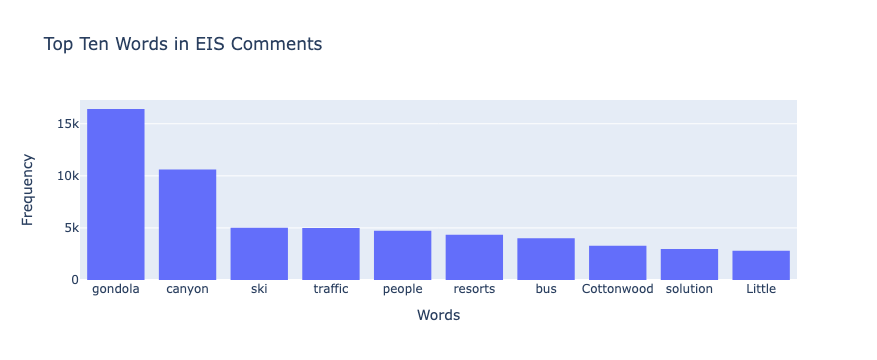

In [54]:
fig = px.histogram(top_ten_words, x = "Words", y = "Frequency", title = "Top Ten Words in EIS Comments")
fig.update_yaxes(title = "Frequency")

In [59]:
Frequency_df.to_csv("Word_Frequency.csv")